<a href="https://colab.research.google.com/github/ZenMachina16/Student-Performance-Prediction/blob/main/Student_Performance_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Uploading Dataset**

In [ ]:
data = pd.read_csv("/content/data.csv")

# **Data Preprocessing**

**Handling Missing values**

In [ ]:
# Assuming 'data' is the DataFrame containing your dataset
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()

# Print the number of missing values for each column
print("Missing values in the dataset:")
print(missing_values)

# Alternatively, you can print a summary of missing values
print("\nSummary of missing values:")
print(data.isnull().sum().describe())


Missing values in the dataset:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Summary of missing values:
count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64


In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'Extracurricular Activities' column
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Verify the replacement
print(data['Extracurricular Activities'].head())


0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64


**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale (standardize) the features in the DataFrame 'data'
scaled_data = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Display the first few rows of the scaled DataFrame
print("Scaled Data:")
print(scaled_df.head())


Scaled Data:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                    1.010455     1.456205   
1      -0.383481         0.723913                   -0.989654    -1.492294   
2       1.161410        -1.063626                    1.010455     0.276805   
3       0.002742        -1.005963                    1.010455    -0.902594   
4       0.775188         0.320275                   -0.989654     0.866505   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249754           1.862167  
1                         -0.900982           0.508818  
2                         -0.900982          -0.532220  
3                         -0.900982          -1.000687  
4                          0.145333           0.560870  


# **Data Visualization**

**Distribution**

In [ ]:
def show_distribution(var):
    fig, ax = plt.subplots(2,1, figsize = (8, 8))
    sns.histplot(data, x = var, color = 'blue', alpha = 0.1, kde = True,ax = ax[0])
    ax[0].set_ylabel("Frequency")
    ax[0].axvline(x = data[var].mean(), color = 'green', ls = "--", lw =2)
    ax[0].axvline(x = data[var].median(), color = 'magenta', ls = "-", lw =2)
    sns.boxplot(data, x = var, ax = ax[1])
    ax[1].set_xlabel(var)
    fig.show()
data['Performance Index'].unique()


array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

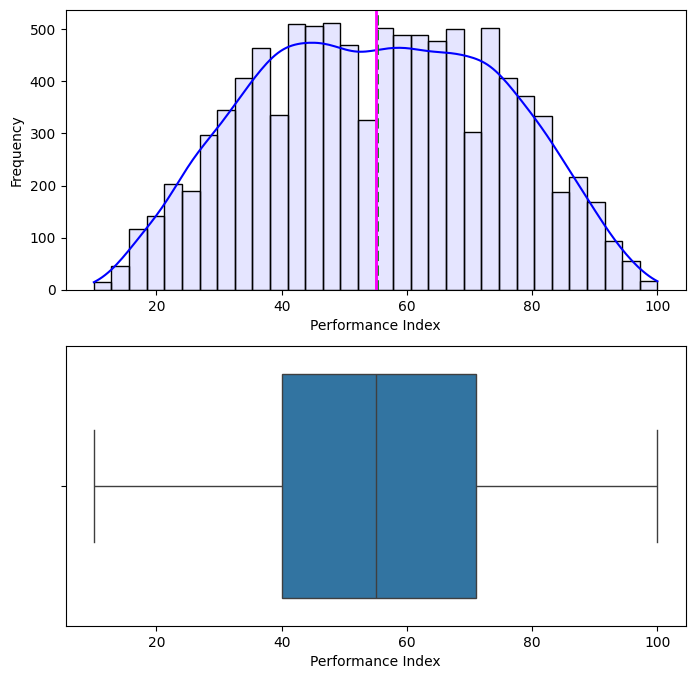

In [ ]:
show_distribution("Performance Index")

**Histogram**

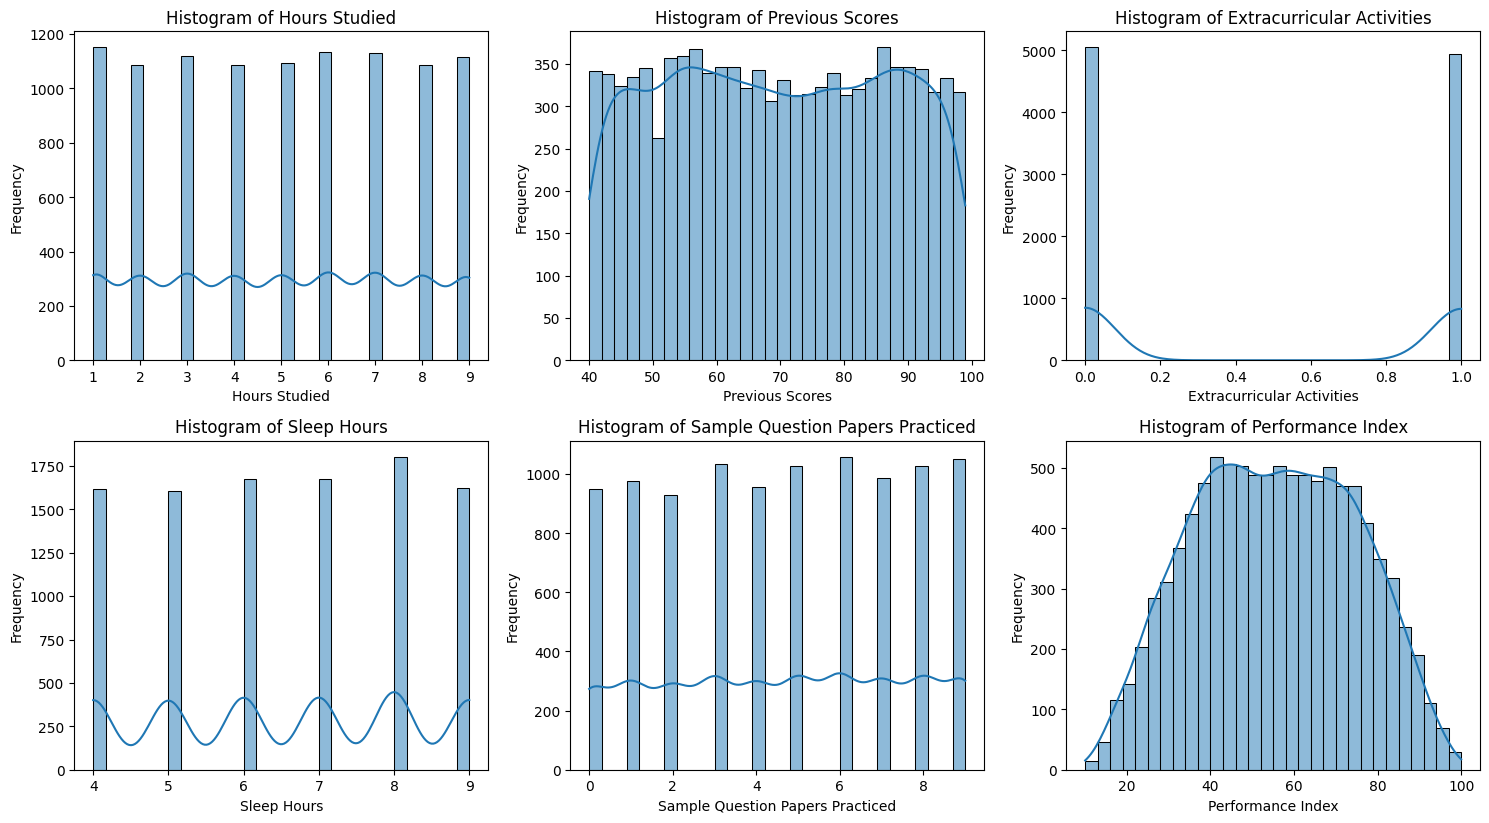

In [ ]:
import matplotlib.pyplot as plt

# Plotting histograms for each numerical feature in the dataset
num_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features):
    plt.subplot(len(num_features) // 3 + 1, 3, i + 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y) based on your dataset
# Assuming 'data' is your DataFrame containing the dataset
X = data.drop(columns=['Performance Index'])  # Replace 'target' with the actual name of your target variable column
y = data['Performance Index']  # Replace 'target' with the actual name of your target variable column

# Split the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 5)
Shape of X_test: (2000, 5)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


# **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)
print("Training R^2:", train_r2)
print("Test R^2:", test_r2)


Training MSE: 4.169735849525007
Test MSE: 4.082628398521853
Training R^2: 0.9886898790682355
Test R^2: 0.9889832909573145


# **Printing Coefficients and Intercepts**

In [ ]:
# Getting the coefficients (weights) and intercept (bias) of the model
coefficients = model.coef_
intercept = model.intercept_

# Assuming you have 5 features, otherwise adjust the range accordingly
for i in range(len(coefficients)):
    print(f"w{i+1} (coefficient for feature {X.columns[i]}):", coefficients[i])

print("b (intercept):", intercept)


w1 (coefficient for feature Hours Studied): 2.8524839300725775
w2 (coefficient for feature Previous Scores): 1.016988198932932
w3 (coefficient for feature Extracurricular Activities): 0.60861667957642
w4 (coefficient for feature Sleep Hours): 0.4769414841762728
w5 (coefficient for feature Sample Question Papers Practiced): 0.19183144145054246
b (intercept): -33.92194621555638


# **Output Visualization**

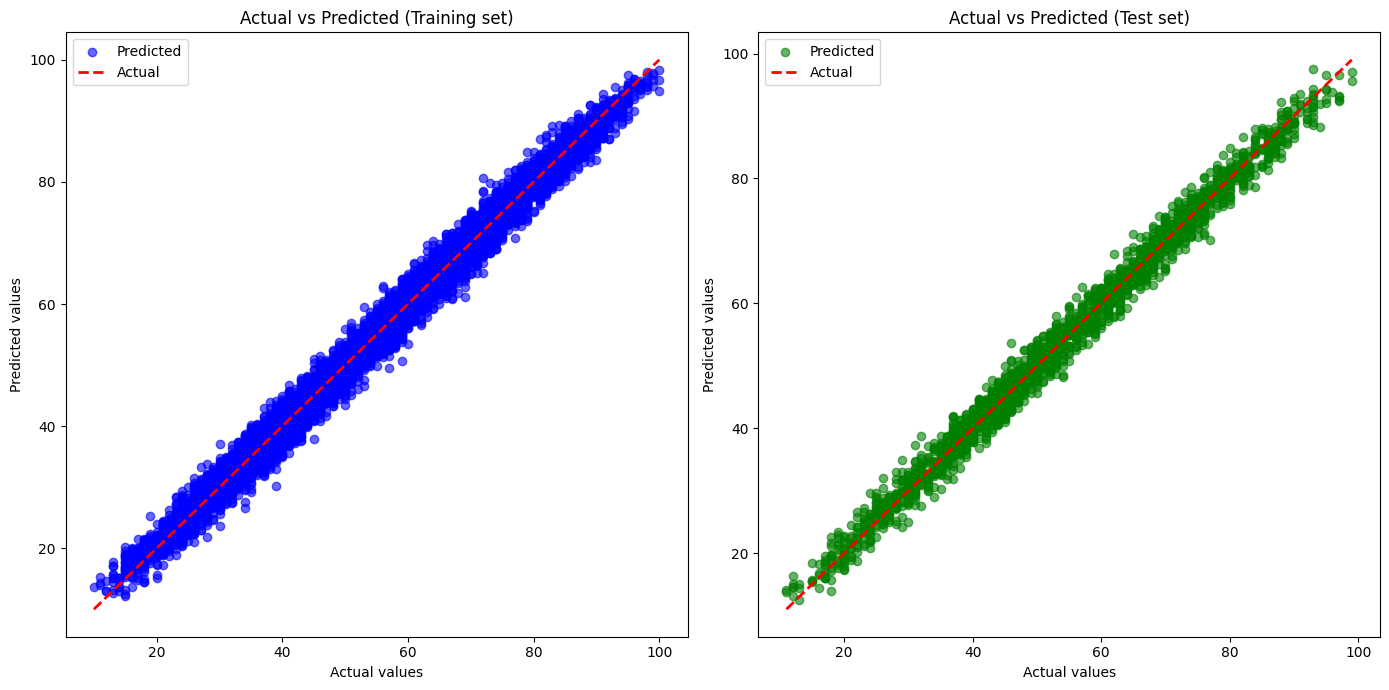

In [ ]:
# Plotting actual vs predicted values for training set
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2, label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted (Training set)')
plt.legend()

# Plotting actual vs predicted values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted (Test set)')
plt.legend()

plt.tight_layout()
plt.show()


# **Printing Test Indices**

In [ ]:
# Convert the indices to a list
test_indices_list = list(X_test.index)

# Print all the indices
print("All indices of the test data:")
print(test_indices_list)

All indices of the test data:
[6252, 4684, 1731, 4742, 4521, 6340, 576, 5202, 6363, 439, 2750, 7487, 5272, 5653, 3999, 6033, 582, 9930, 7051, 8158, 9896, 2249, 4640, 9485, 4947, 9920, 1963, 8243, 6590, 8847, 321, 2678, 4625, 4949, 8328, 3337, 5589, 251, 3973, 6630, 5547, 35, 8362, 1513, 9317, 39, 4819, 3465, 1760, 2304, 3723, 8284, 4993, 8127, 3032, 7938, 3039, 9655, 2545, 2592, 1188, 7966, 6077, 107, 1315, 8187, 2753, 9753, 6231, 2876, 5323, 799, 3570, 2894, 2927, 8178, 971, 6687, 8575, 2020, 9054, 952, 5359, 3857, 5861, 3145, 3305, 3006, 9001, 7770, 7438, 7942, 9238, 1056, 3154, 3787, 9189, 7825, 7539, 7231, 764, 5019, 4903, 8093, 6843, 2165, 1862, 7850, 9123, 2340, 5527, 6743, 4003, 1123, 8709, 4049, 7640, 765, 2344, 4071, 7216, 4216, 7952, 5970, 3350, 4695, 3399, 4081, 9149, 1224, 6292, 3122, 510, 5794, 8181, 9417, 96, 6681, 1512, 8791, 119, 7791, 6517, 33, 7887, 6830, 5421, 1068, 1347, 4747, 6005, 6039, 3817, 8446, 5269, 6897, 5309, 31, 5674, 4386, 29, 4202, 7507, 735, 2067, 106, 

# **Prediction for User Generated Values**

In [ ]:
import numpy as np

def get_user_input():
    # Replace the following list with the actual feature names in the correct order
    feature_names = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours','Sample Question Papers Practiced']  # Example feature names

    # Initialize an empty list to store input values
    input_values = []

    # Loop through each feature name and prompt the user for input
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        input_values.append(value)

    # Convert the list of input values to a numpy array and reshape it
    input_array = np.array(input_values).reshape(1, -1)

    return input_array

# Get user input
user_input = get_user_input()

# Make prediction
prediction = model.predict(user_input)

# Display the prediction
print(f"Performance Index: {prediction[0]}")
